# 1.0 Introdução 

O objetivo deste estudo é investigar e validar os diferentes fatores pessoais, sociais e econômicos que influenciam o desempenho dos estudantes. A análise foi realizada utilizando dados fictícios sobre o desempenho de alunos em matemática, leitura e escrita disponibilizados no site [kaggle](https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics)

O dataset tem as seguintes colunas:
- **Gender**: o sexo do aluno (masculino/feminino)
- **Race/Ethnicity**: a origem racial ou étnica do aluno (asiática, afro-americana, hispânica, etc.)
- **Parental level of education**: o nível mais alto de educação alcançado pelo(s) pai(s) ou tutor(es) do aluno
- **Lunch**: Se o aluno recebe almoço gratuito ou a preço reduzido (sim/não)
- **Test Preparation Course**: Se o aluno concluiu um curso de preparação para testes (sim/não)
- **Math Score**: a pontuação do aluno em um teste padronizado de matemática
- **Reading Score**:A pontuação do aluno em um teste de leitura padronizado
- **Writing Score**: a pontuação do aluno em um teste de redação padronizado

As seguintes questões serão abordadas durante a análise:

1. **Existe uma diferença nas pontuações entre alunos que concluíram um curso de preparação para testes e aqueles que não concluíram?**
2. **Qual é a distribuição das pontuações entre os diferentes níveis educacionais dos pais?**
3. **Há uma correlação entre as pontuações de leitura e as pontuações de escrita dos alunos?**
4. **Alunos que recebem almoço gratuito ou a preço reduzido têm pontuações significativamente diferentes daqueles que não recebem?**
5. **Existe uma relação entre a origem racial ou étnica dos alunos e suas pontuações?**
6. **Qual é a proporção de alunos que concluíram um curso de preparação para testes em relação ao gênero?**
7. **Há uma diferença nas pontuações entre alunos do sexo masculino e feminino?**

## 1.1 Importando Bibliotecas e Carregando Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')

In [2]:
df = pd.read_csv('exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


## 1.2 Checando Estatisticas Iniciais e Valores Nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,67.810,15.250196,15.0,58.0,68.0,79.25,100.0
reading score,1000.0,70.382,14.107413,25.0,61.0,70.5,80.00,100.0
writing score,1000.0,69.140,15.025917,15.0,59.0,70.0,80.00,100.0


In [5]:
# O dataset não apresenta valores nulos
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 2.0 Análise Univariada

## 2.1 Contando cada uma das variáveis

In [6]:
gender_counts = df['gender'].value_counts()
race_ethnicity_counts = df['race/ethnicity'].value_counts()
parental_education_counts = df['parental level of education'].value_counts()
lunch_counts = df['lunch'].value_counts()
test_preparation_counts = df['test preparation course'].value_counts()


print(gender_counts)
print('----------------------------------------------------------')
print(race_ethnicity_counts)
print('----------------------------------------------------------')
print(parental_education_counts)
print('----------------------------------------------------------')
print(lunch_counts)
print('----------------------------------------------------------')
print(test_preparation_counts)

male      508
female    492
Name: gender, dtype: int64
----------------------------------------------------------
group C    323
group D    257
group B    198
group E    143
group A     79
Name: race/ethnicity, dtype: int64
----------------------------------------------------------
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64
----------------------------------------------------------
standard        660
free/reduced    340
Name: lunch, dtype: int64
----------------------------------------------------------
none         656
completed    344
Name: test preparation course, dtype: int64


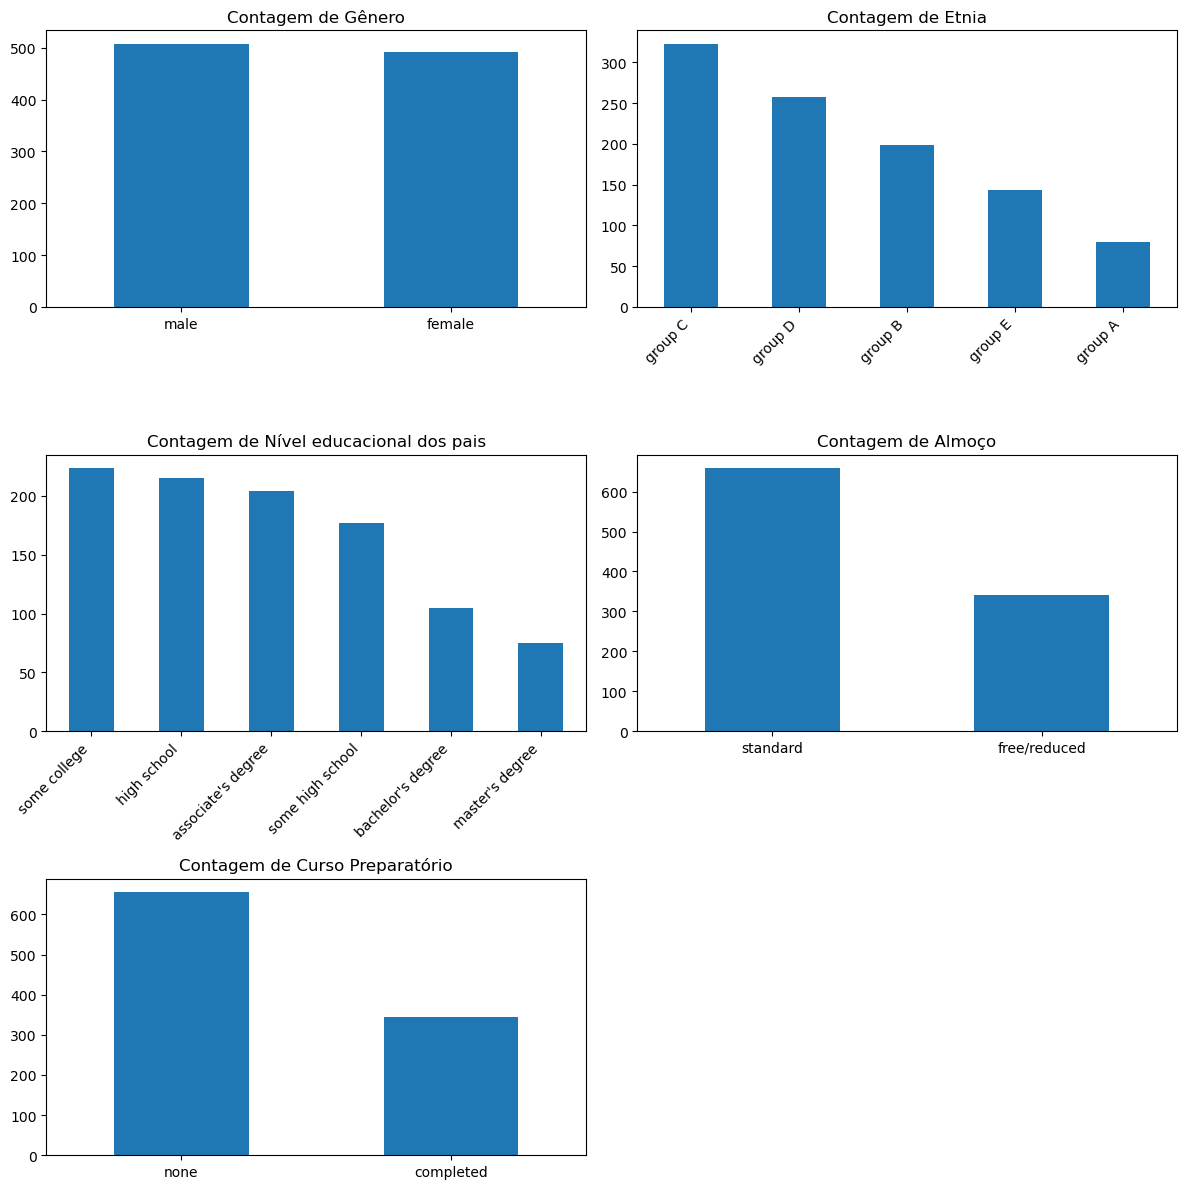

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

gender_counts.plot(kind='bar', ax=axes[0, 0], title='Contagem de Gênero')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

race_ethnicity_counts.plot(kind='bar', ax=axes[0, 1], title='Contagem de Etnia')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

parental_education_counts.plot(kind='bar', ax=axes[1, 0], title='Contagem de Nível educacional dos pais')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

lunch_counts.plot(kind='bar', ax=axes[1, 1], title='Contagem de Almoço')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0,)

test_preparation_counts.plot(kind='bar', ax=axes[2, 0], title='Contagem de Curso Preparatório')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=0)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

## 2.2 Plotando distribuição de cada uma das notas

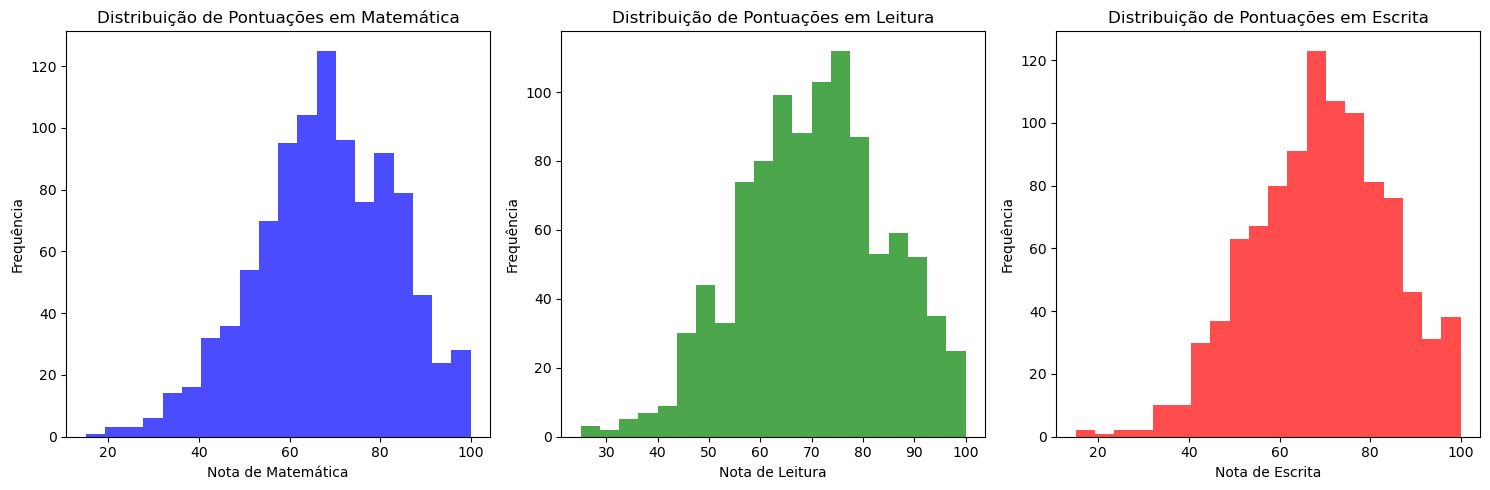

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['math score'], bins=20, color='blue', alpha=0.7)
axes[0].set_title('Distribuição de Pontuações em Matemática')
axes[0].set_xlabel('Nota de Matemática')
axes[0].set_ylabel('Frequência')

axes[1].hist(df['reading score'], bins=20, color='green', alpha=0.7)
axes[1].set_title('Distribuição de Pontuações em Leitura')
axes[1].set_xlabel('Nota de Leitura')
axes[1].set_ylabel('Frequência')

axes[2].hist(df['writing score'], bins=20, color='red', alpha=0.7)
axes[2].set_title('Distribuição de Pontuações em Escrita')
axes[2].set_xlabel('Nota de Escrita')
axes[2].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# 3.0 Análise Bivariada

## 3.1 Notas x Gênero

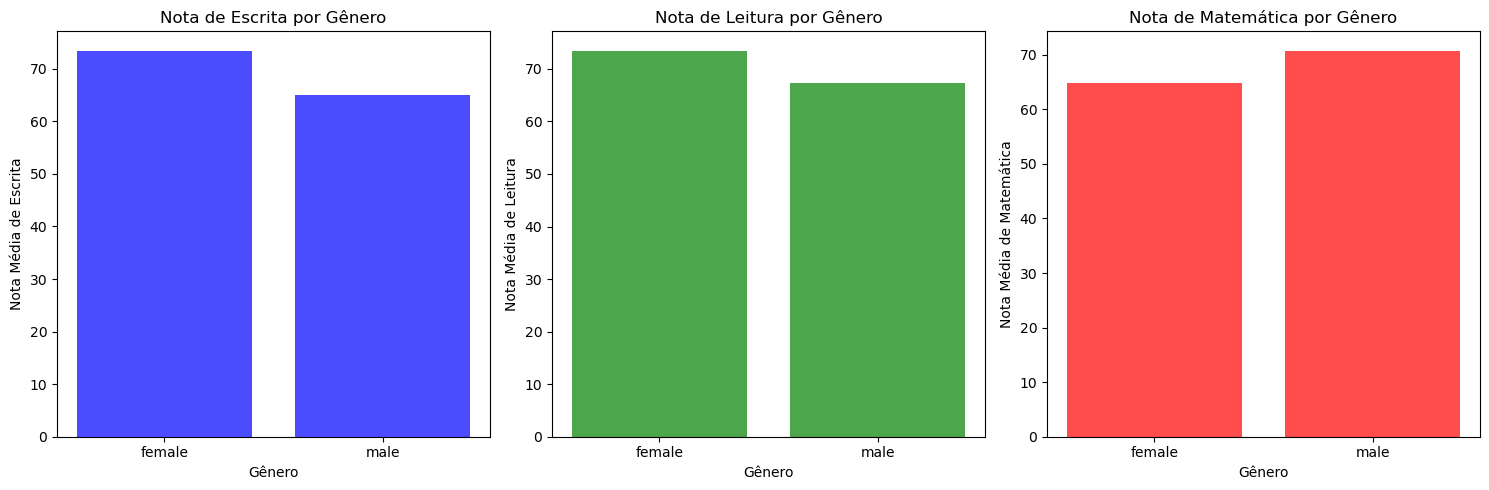

In [9]:
writing_score_by_gender = df.groupby('gender')['writing score'].mean()
reading_score_by_gender = df.groupby('gender')['reading score'].mean()
math_score_by_gender = df.groupby('gender')['math score'].mean()

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].bar(writing_score_by_gender.index, writing_score_by_gender.values, color='blue', alpha=0.7)
axes[0].set_title('Nota de Escrita por Gênero')
axes[0].set_xlabel('Gênero')
axes[0].set_ylabel('Nota Média de Escrita')


axes[1].bar(reading_score_by_gender.index, reading_score_by_gender.values, color='green', alpha=0.7)
axes[1].set_title('Nota de Leitura por Gênero')
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('Nota Média de Leitura')

axes[2].bar(math_score_by_gender.index, math_score_by_gender.values, color='red', alpha=0.7)
axes[2].set_title('Nota de Matemática por Gênero')
axes[2].set_xlabel('Gênero')
axes[2].set_ylabel('Nota Média de Matemática')

plt.tight_layout()
plt.show()

## 3.2 Notas X Teste Preparation

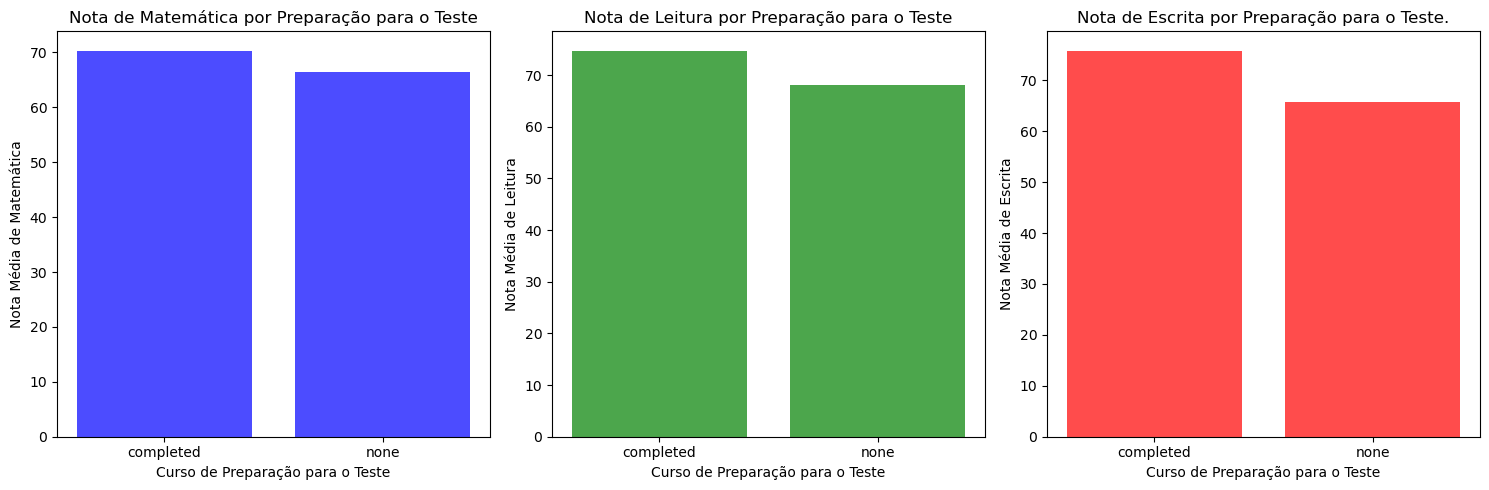

In [10]:
writing_score_by_TestPreparation = df.groupby('test preparation course')['writing score'].mean()
reading_score_by_TestPreparation = df.groupby('test preparation course')['reading score'].mean()
math_score_by_TestPreparation = df.groupby('test preparation course')['math score'].mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(math_score_by_TestPreparation.index, math_score_by_TestPreparation.values, color='blue', alpha=0.7)
axes[0].set_title('Nota de Matemática por Preparação para o Teste')
axes[0].set_xlabel('Curso de Preparação para o Teste')
axes[0].set_ylabel('Nota Média de Matemática')

axes[1].bar(reading_score_by_TestPreparation.index, reading_score_by_TestPreparation.values, color='green', alpha=0.7)
axes[1].set_title('Nota de Leitura por Preparação para o Teste')
axes[1].set_xlabel('Curso de Preparação para o Teste')
axes[1].set_ylabel('Nota Média de Leitura')

axes[2].bar(writing_score_by_TestPreparation.index, writing_score_by_TestPreparation.values, color='red', alpha=0.7)
axes[2].set_title('Nota de Escrita por Preparação para o Teste.')
axes[2].set_xlabel('Curso de Preparação para o Teste')
axes[2].set_ylabel('Nota Média de Escrita')

plt.tight_layout()
plt.show()

## 3.3 Notas X Etnia

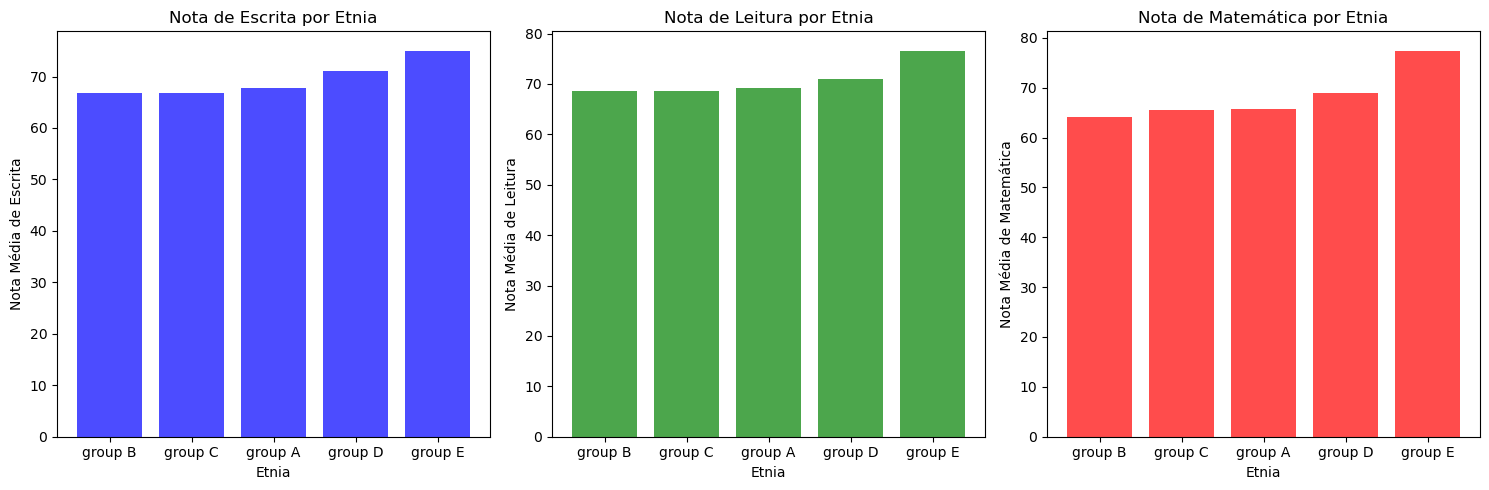

In [11]:
writing_score_by_raceEthnicity = df.groupby('race/ethnicity')['writing score'].mean().sort_values(ascending=True)
reading_score_by_raceEthnicity = df.groupby('race/ethnicity')['reading score'].mean().sort_values(ascending=True)
math_score_by_raceEthnicity = df.groupby('race/ethnicity')['math score'].mean().sort_values(ascending=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(writing_score_by_raceEthnicity.index, writing_score_by_raceEthnicity.values, color='blue', alpha=0.7)
axes[0].set_title('Nota de Escrita por Etnia')
axes[0].set_xlabel('Etnia')
axes[0].set_ylabel('Nota Média de Escrita')

axes[1].bar(reading_score_by_raceEthnicity.index, reading_score_by_raceEthnicity.values, color='green', alpha=0.7)
axes[1].set_title('Nota de Leitura por Etnia')
axes[1].set_xlabel('Etnia')
axes[1].set_ylabel('Nota Média de Leitura')

axes[2].bar(math_score_by_raceEthnicity.index, math_score_by_raceEthnicity.values, color='red', alpha=0.7)
axes[2].set_title('Nota de Matemática por Etnia')
axes[2].set_xlabel('Etnia')
axes[2].set_ylabel('Nota Média de Matemática')

plt.tight_layout()
plt.show()

## 3.4  Notas X Nivel de Educação Parental

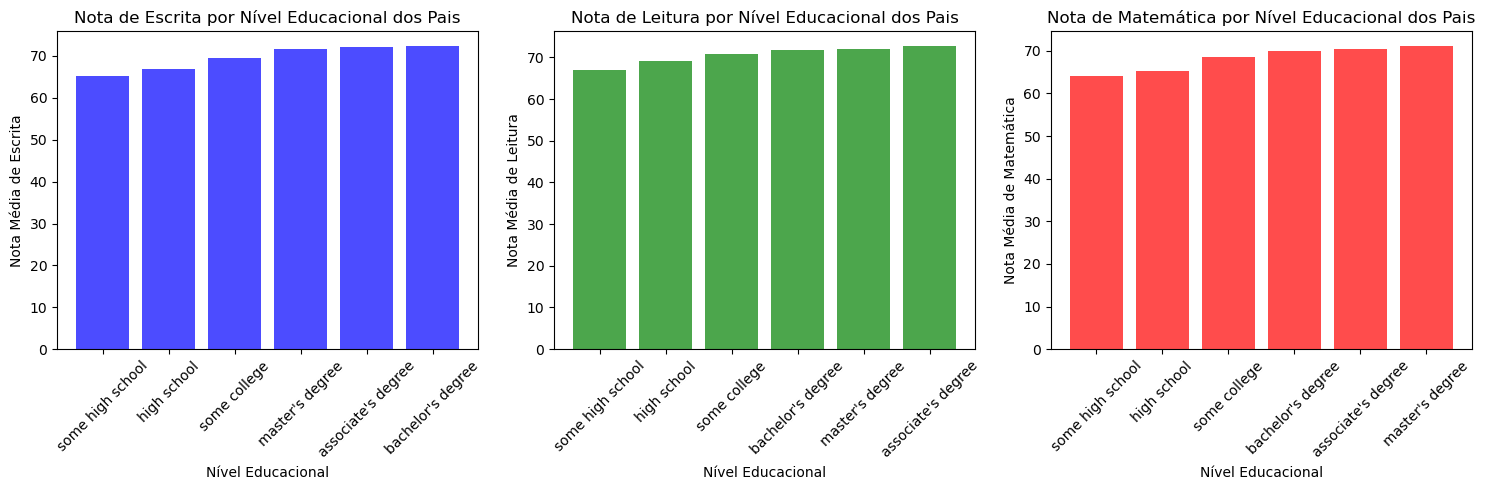

In [12]:
writing_score_by_parentalLVL = df.groupby('parental level of education')['writing score'].mean().sort_values()
reading_score_by_parentalLVL = df.groupby('parental level of education')['reading score'].mean().sort_values()
math_score_by_parentalLVL = df.groupby('parental level of education')['math score'].mean().sort_values()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(writing_score_by_parentalLVL.index, writing_score_by_parentalLVL.values, color='blue', alpha=0.7)
axes[0].set_title('Nota de Escrita por Nível Educacional dos Pais')
axes[0].set_xlabel('Nível Educacional')
axes[0].set_ylabel('Nota Média de Escrita')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(reading_score_by_parentalLVL.index, reading_score_by_parentalLVL.values, color='green', alpha=0.7)
axes[1].set_title('Nota de Leitura por Nível Educacional dos Pais')
axes[1].set_xlabel('Nível Educacional')
axes[1].set_ylabel('Nota Média de Leitura')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(math_score_by_parentalLVL.index, math_score_by_parentalLVL.values, color='red', alpha=0.7)
axes[2].set_title('Nota de Matemática por Nível Educacional dos Pais')
axes[2].set_xlabel('Nível Educacional')
axes[2].set_ylabel('Nota Média de Matemática')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3.5 Notas X Almoço 

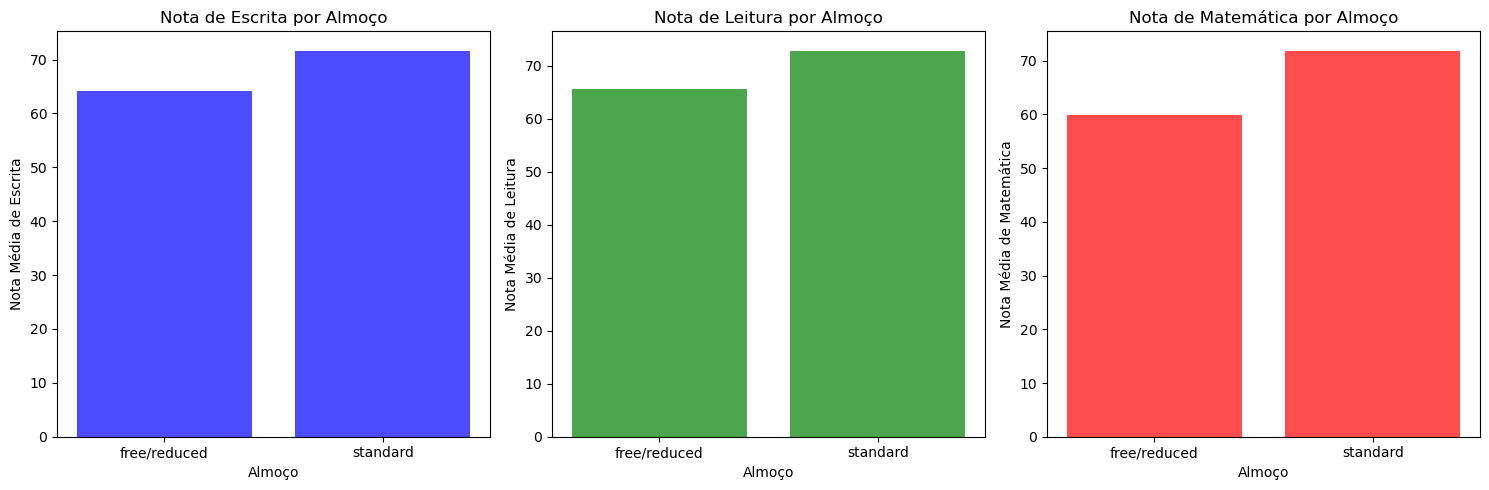

In [13]:
writing_score_by_lunch = df.groupby('lunch')['writing score'].mean()
reading_score_by_lunch = df.groupby('lunch')['reading score'].mean()
math_score_by_lunch = df.groupby('lunch')['math score'].mean()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(writing_score_by_lunch.index, writing_score_by_lunch.values, color='blue', alpha=0.7)
axes[0].set_title('Nota de Escrita por Almoço')
axes[0].set_xlabel('Almoço')
axes[0].set_ylabel('Nota Média de Escrita')

axes[1].bar(reading_score_by_lunch.index, reading_score_by_lunch.values, color='green', alpha=0.7)
axes[1].set_title('Nota de Leitura por Almoço')
axes[1].set_xlabel('Almoço')
axes[1].set_ylabel('Nota Média de Leitura')

axes[2].bar(math_score_by_lunch.index, math_score_by_lunch.values, color='red', alpha=0.7)
axes[2].set_title('Nota de Matemática por Almoço')
axes[2].set_xlabel('Almoço')
axes[2].set_ylabel('Nota Média de Matemática')

plt.tight_layout()
plt.show()

## 3.6 Etnia x Almoço

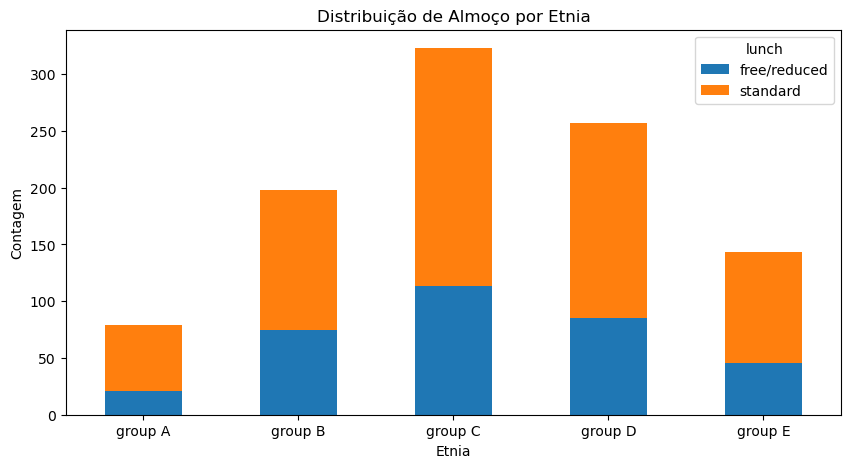

In [24]:
grouped_race_lunch = df.groupby(['race/ethnicity', 'lunch']).size().unstack()

grouped_race_lunch.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Distribuição de Almoço por Etnia')
plt.xlabel('Etnia')
plt.tick_params(axis='x', rotation=0)
plt.ylabel('Contagem')

plt.show()

## 3.7 Enia X Parental Level of Education

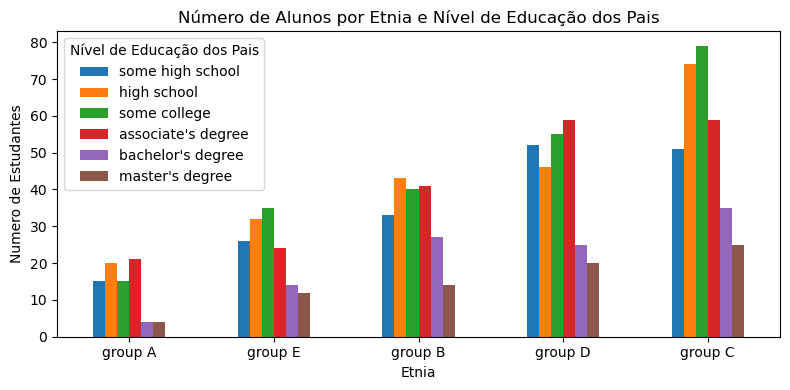

In [15]:
# Create a dictionary to map parental level of education to numerical values
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

df['numerical_education'] = df['parental level of education'].map(education_mapping)

# Group the data
pivot_grouped_data = df.groupby(['race/ethnicity', 'numerical_education']).size().reset_index(name='count').pivot(index='race/ethnicity', columns='numerical_education', values='count')


pivot_grouped_data['total'] = pivot_grouped_data.sum(axis=1)
pivot_grouped_data = pivot_grouped_data.sort_values(by='total', ascending=True).drop(columns='total')

# Sort the columns in ascending order
pivot_grouped_data = pivot_grouped_data.sort_index(axis=1)


pivot_grouped_data.plot(kind='bar', figsize=(8, 4))
plt.title('Número de Alunos por Etnia e Nível de Educação dos Pais')
plt.xlabel('Etnia')
plt.ylabel('Numero de Estudantes')
plt.xticks(rotation=0)
plt.legend(title='Nível de Educação dos Pais', labels=sorted(education_mapping, key=education_mapping.get))

plt.tight_layout()
plt.show()

## 3.7 Gênero x Nível de Educação Parental

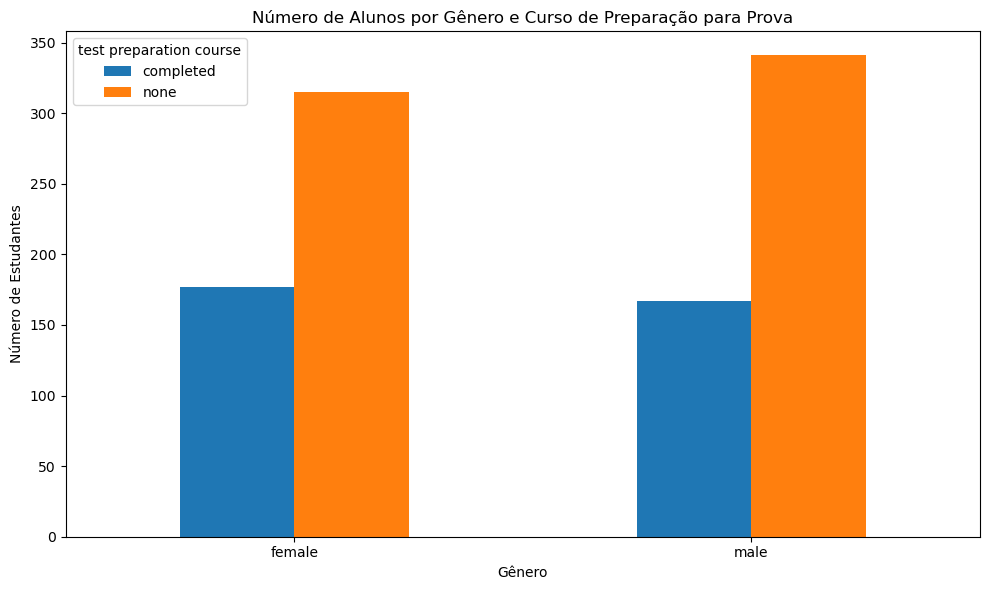

In [16]:
grouped_gender_prep_course = df.groupby(['gender', 'test preparation course']).size().reset_index(name='count').sort_values(by='count', ascending=True)

ax = grouped_gender_prep_course.pivot(index='gender', columns='test preparation course', values='count').plot(kind='bar', figsize=(10, 6))
plt.title('Número de Alunos por Gênero e Curso de Preparação para Prova')
plt.xlabel('Gênero')
plt.ylabel('Número de Estudantes')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 4.0 Análise Multivariada

## 4.1 Matriz de Correlação

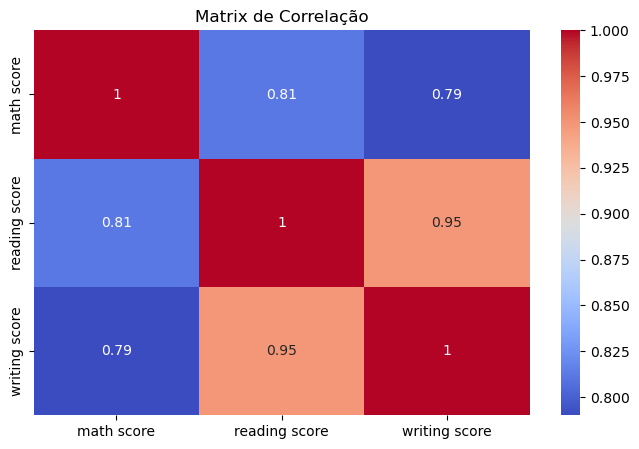

In [17]:
correlation_matrix = df.drop(columns='numerical_education').corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix de Correlação')
plt.show()

## 4.2 Nivel de Educação Parental & Gênero x Nota de Escrita

<ipython-input-18-764e34a9f809>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  writing_score_by_parental_edu_gender = df.groupby(['parental level of education', 'gender'])['writing score','reading score','math score'].mean()


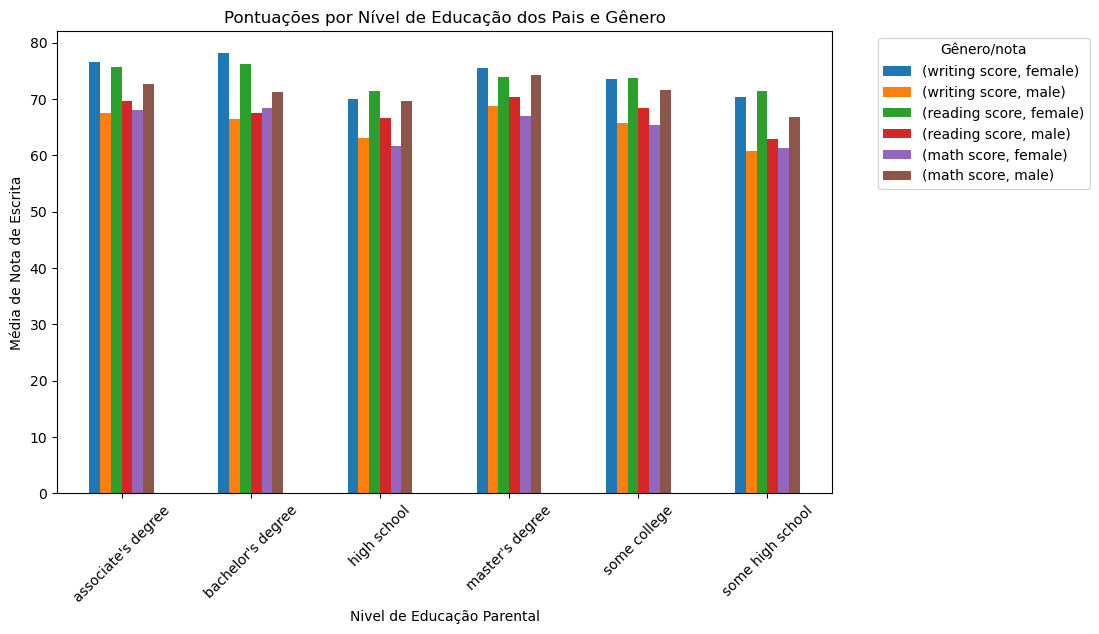

In [18]:
writing_score_by_parental_edu_gender = df.groupby(['parental level of education', 'gender'])['writing score','reading score','math score'].mean()
writing_score_by_parental_edu_gender

writing_score_by_parental_edu_gender.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Pontuações por Nível de Educação dos Pais e Gênero')
plt.xlabel('Nivel de Educação Parental')
plt.ylabel('Média de Nota de Escrita')
plt.xticks(rotation=45)
plt.legend(title='Gênero/nota', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5.0 Resultados da Análise

Com base nas análises realizadas no conjunto de dados, chegamos às seguintes conclusões em resposta a cada uma das perguntas propostas no começo do notebook:

### 5.1 Existe uma diferença nas pontuações entre alunos que concluíram um curso de preparação para testes e aqueles que não concluíram?

R: Há uma melhoria significativa na média de notas dos alunos que realizaram o curso de preparação em comparação aos que não o fizeram. Observou-se um aumento de 5.79%, 9.92% e 15.47% nas notas de matemática, leitura e escrita, respectivamente. Esses resultados destacam a influência positiva do curso de preparação nas pontuações dos alunos em todas as áreas avaliadas.

### 5.2 Qual é a distribuição das pontuações entre os diferentes níveis educacionais dos pais?

R: Observa-se que os alunos cujos pais têm um nível educacional mais alto, como "associate's degree", "bachelor's degree" e "master's degree", apresentam pontuações mais altas em escrita, leitura e matemática, em comparação com aqueles cujos pais têm um nível educacional mais baixo, como "some high school" e "high school". A diferença nas pontuações é mais acentuada em matemática, onde a média dos alunos com pais com "associate's degree" é aproximadamente 9,54% maior do que aqueles com "some high school". Em escrita, a diferença é de aproximadamente 10,65% entre os mesmos grupos. Já em leitura, a diferença é de aproximadamente 9,39%.

### 5.3 Há uma correlação entre as pontuações de leitura e as pontuações de escrita dos alunos?

R: Foi observada uma forte correlação positiva de 0.95 entre as pontuações de leitura e as pontuações de escrita dos alunos. No entanto, é importante observar que correlação não implica em causalidade. Em outras palavras, essa relação não necessariamente indica que um desempenho elevado em leitura causa um desempenho elevado em escrita, ou vice-versa.

### 5.4 Alunos que recebem almoço gratuito ou a preço reduzido têm pontuações significativamente diferentes daqueles que não recebem?

R: Com base na análise das pontuações, conclui-se que os alunos que recebem almoço gratuito ou a preço reduzido têm pontuações significativamente mais baixas do que aqueles que não recebem. Em relação à pontuação em escrita, os alunos que recebem almoço gratuito ou a preço reduzido têm uma diferença negativa de aproximadamente 10.37% em comparação com os alunos que não recebem. Na pontuação em leitura, a diferença é de aproximadamente 9.84%, e na pontuação em matemática, a diferença é de aproximadamente 16.70%.

### 5.5 Existe uma relação entre a origem racial ou étnica dos alunos e suas pontuações?

R: De acordo com a análise, foram observadas diferenças significativas nas pontuações entre os grupos étnicos. Os alunos do grupo E apresentaram as maiores médias de pontuação em escrita (75.03), leitura (76.42) e matemática (77.42). Em contraste, os alunos do grupo B apresentaram as menores médias de pontuação em escrita (66.71), leitura (68.53) e matemática (64.07). Esses resultados indicam uma associação entre a origem racial ou étnica dos alunos e suas pontuações nas três áreas avaliadas.

### 5.6 Qual é a proporção de alunos que concluíram um curso de preparação para testes em relação ao gênero?

R: Com base na análise da proporção de alunos que concluíram o curso de preparação em relação ao gênero, podemos concluir que a taxa de conclusão é ligeiramente maior entre as alunas do sexo feminino em comparação aos alunos do sexo masculino. Cerca de 35.9% das alunas concluíram o curso, enquanto aproximadamente 32.8% dos alunos do sexo masculino o concluíram. Esses resultados sugerem que, em geral, as alunas têm uma tendência um pouco maior de se engajarem e concluírem o curso de preparação.

### 5.7 Há uma diferença nas pontuações entre alunos do sexo masculino e feminino?

R: Há diferenças nas pontuações entre alunos do sexo masculino e feminino em cada disciplina. As alunas obtiveram pontuações mais altas em escrita e leitura, com uma vantagem de aproximadamente 13,03%. Por outro lado, os alunos tiveram pontuações mais altas em matemática, com uma vantagem de cerca de 9,03%.

## Conclusão

Em conclusão, este estudo identificou vários fatores que influenciam o desempenho dos estudantes nas áreas de matemática, leitura e escrita. 
- A participação em um curso de preparação para testes mostrou-se benéfica, resultando em melhorias significativas nas pontuações dos alunos. 
- O nível educacional dos pais também desempenha um papel importante, com alunos cujos pais possuem níveis mais altos de educação obtendo pontuações mais altas. 
- Além disso, foi observada uma forte correlação positiva entre as habilidades de leitura e escrita dos alunos. 
- A situação socioeconômica dos alunos, representada pelo recebimento de almoço gratuito ou a preço reduzido, afetou negativamente suas pontuações. 
- A origem racial ou étnica também teve um impacto nas pontuações dos alunos, com diferenças significativas entre os grupos étnicos.
- As alunas apresentaram taxas de conclusão ligeiramente mais altas no curso de preparação e obtiveram pontuações mais altas em escrita e leitura, enquanto os alunos apresentaram pontuações mais altas em matemática. 

Essas conclusões ressaltam a importância de considerar esses fatores ao desenvolver estratégias educacionais e fornecer apoio adequado aos estudantes para melhorar seu desempenho acadêmico.